# 2. Getting Started

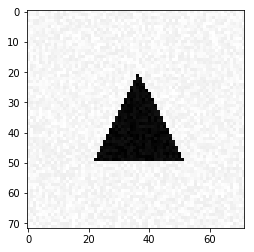

In [716]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
            #print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]



# 3. Simple Classification

# 3.1. Generating Training Data

In [717]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


#    3.2. Reformating the Input

In [718]:
X_train = X_train.reshape(X_train.shape[0], 5184)
print(X_train.shape)

(300, 5184)


# 3.3. Reformating the Desired Ouput

In [719]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train, 3)
 
print(Y_train.shape)

(300, 3)


# 3.4. Creating the Model


In [720]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
#Creating the Model
model = Sequential()

model.add(Dense(3, input_shape=(5184,)))
model.add(Activation('sigmoid'))
print(model.output_shape)


(None, 3)


# 3.5 Optimization 

# 3.5.1 Gradient Descent Optimizer

In [721]:
from keras.optimizers import SGD
sgd = SGD(lr=0.005,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd) 

history=model.fit(X_train, Y_train, validation_split=0.33, epochs=30, batch_size=32, verbose=1) 
print(model.summary())


Train on 200 samples, validate on 100 samples
Epoch 1/30
200/200 [==============================] - 8s 38ms/step - loss: 0.2308 - val_loss: 0.2009
Epoch 2/30
200/200 [==============================] - 0s 450us/step - loss: 0.1704 - val_loss: 0.1708
Epoch 3/30
200/200 [==============================] - 0s 405us/step - loss: 0.1433 - val_loss: 0.1895
Epoch 4/30
200/200 [==============================] - 0s 405us/step - loss: 0.1331 - val_loss: 0.1257
Epoch 5/30
200/200 [==============================] - 0s 390us/step - loss: 0.1061 - val_loss: 0.1173
Epoch 6/30
200/200 [==============================] - 0s 380us/step - loss: 0.0925 - val_loss: 0.1096
Epoch 7/30
200/200 [==============================] - 0s 410us/step - loss: 0.0844 - val_loss: 0.0943
Epoch 8/30
200/200 [==============================] - 0s 405us/step - loss: 0.0755 - val_loss: 0.0865
Epoch 9/30
200/200 [==============================] - 0s 375us/step - loss: 0.0717 - val_loss: 0.0894
Epoch 10/30
200/200 [================

# 3.5.1.1. Visualize Model Training History

dict_keys(['val_loss', 'loss'])


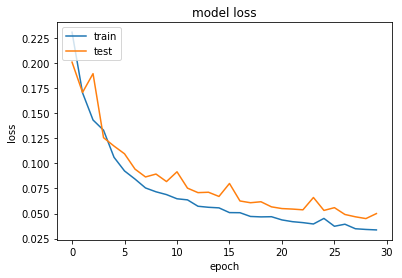

In [722]:
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). 


# 3.5.1.2. Testing


[[0. 1. 0.]]


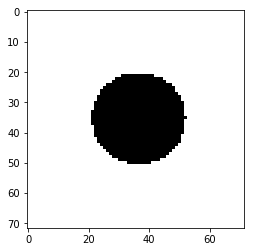

In [723]:
X_test = generate_a_disk()
X_test = X_test.reshape(1,X_test.shape[0])
Y_pred = model.predict(X_test)
print(Y_pred)
plt.imshow(X_test.reshape(72,72), cmap='gray')


[[1. 0. 0.]]


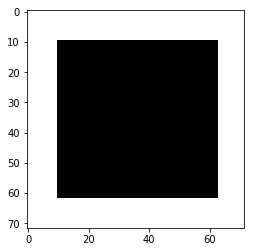

In [724]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
Y_pred = model.predict(X_test)
plt.imshow(X_test.reshape(72,72), cmap='gray')
print(Y_pred)

# 3.5.2. Adam Optimizer

In [725]:
from keras.optimizers import Adam
#Creating the Model
model = Sequential()
model.add(Dense(3, input_shape=(5184,)))
model.add(Activation('sigmoid'))
print(model.output_shape)

adam=Adam(lr=0.0005)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
#Running the Optimization
history1=model.fit(X_train, Y_train,batch_size=32 ,validation_split=0.3, epochs=30, verbose=1) 
print(model.summary())


(None, 3)
Train on 210 samples, validate on 90 samples
Epoch 1/30
210/210 [==============================] - 7s 34ms/step - loss: 0.7037 - acc: 0.6175 - val_loss: 0.6383 - val_acc: 0.6259
Epoch 2/30
210/210 [==============================] - 0s 710us/step - loss: 0.5631 - acc: 0.7000 - val_loss: 0.5303 - val_acc: 0.6926
Epoch 3/30
210/210 [==============================] - 0s 486us/step - loss: 0.4991 - acc: 0.7476 - val_loss: 0.4810 - val_acc: 0.7519
Epoch 4/30
210/210 [==============================] - 0s 624us/step - loss: 0.4248 - acc: 0.8270 - val_loss: 0.4064 - val_acc: 0.8519
Epoch 5/30
210/210 [==============================] - 0s 600us/step - loss: 0.3835 - acc: 0.8667 - val_loss: 0.3949 - val_acc: 0.8222
Epoch 6/30
210/210 [==============================] - 0s 619us/step - loss: 0.3474 - acc: 0.8762 - val_loss: 0.3545 - val_acc: 0.8667
Epoch 7/30
210/210 [==============================] - 0s 624us/step - loss: 0.3220 - acc: 0.8857 - val_loss: 0.3298 - val_acc: 0.8852
Epoch 8/

# 3.5.2.1. Visualize Model Training History

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


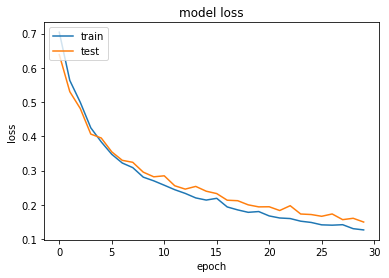

In [726]:
print(history1.history.keys())

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3.5.2.2. Testing

[[0. 1. 0.]]


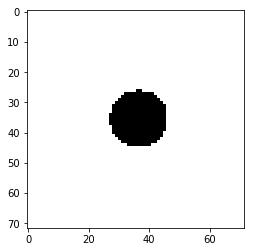

In [727]:
X_test = generate_a_disk()
X_test = X_test.reshape(1,X_test.shape[0])
Y_pred = model.predict(X_test)
print(Y_pred)
plt.imshow(X_test.reshape(72,72), cmap='gray')

[[1. 0. 0.]]


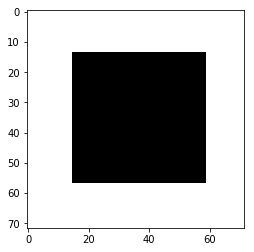

In [728]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
Y_pred = model.predict(X_test)
plt.imshow(X_test.reshape(72,72), cmap='gray')
print(Y_pred)


=> The Adam optimizer seems to converge correctly

# 4. Visualization of the Solution


- We would like to visualize the weights of the linear classifier

In [729]:
weights=model.get_weights()

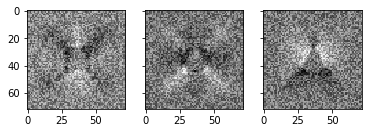

In [730]:
f, (w1, w2,w3) = plt.subplots(1, 3, sharey=True)
w1.imshow(weights[0][:,0].reshape(72,72), cmap='gray')
w2.imshow(weights[0][:,1].reshape(72,72), cmap='gray')
w3.imshow(weights[0][:,2].reshape(72,72), cmap='gray')

plt.show()

- We visualize the learned weights feeding into the  output neurons. We color-code to see the different weights.Each figuer looks like somewhat blurry versions of a geometrical form. We can see in the first one the shape of a rectangle,then the shape of a disk in the second one and finally the shape of a triangle in the last one.


# 5. A More Difficult Classifiction Problem

# 5.1. Generating Training Data

In [731]:
[X_train0, Y_train0] = generate_dataset_classification(300, 20, True)
from keras.utils import np_utils
Y_train0 = np_utils.to_categorical(Y_train0, 3)
X_train2=X_train0
Y_train2=Y_train0


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


# 5.2. Linear Classifier

In [732]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Dense(3, input_shape=(5184,)))
model.add(Activation('sigmoid'))
print(model.output_shape)

from keras.optimizers import SGD
sgd = SGD(lr=0.005,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy']) 
history2=model.fit(X_train2, Y_train2, epochs=200, batch_size=16) 


print(model.summary())

(None, 3)
Epoch 1/200
300/300 [==============================] - 6s 21ms/step - loss: 0.2681 - acc: 0.3600
Epoch 2/200
300/300 [==============================] - 0s 550us/step - loss: 0.2344 - acc: 0.4633
Epoch 3/200
300/300 [==============================] - 0s 650us/step - loss: 0.2086 - acc: 0.4800
Epoch 4/200
300/300 [==============================] - 0s 643us/step - loss: 0.1889 - acc: 0.5433
Epoch 5/200
300/300 [==============================] - 0s 620us/step - loss: 0.1764 - acc: 0.5567
Epoch 6/200
300/300 [==============================] - 0s 673us/step - loss: 0.1765 - acc: 0.5667
Epoch 7/200
300/300 [==============================] - 0s 607us/step - loss: 0.1685 - acc: 0.6000
Epoch 8/200
300/300 [==============================] - 0s 530us/step - loss: 0.1751 - acc: 0.5900
Epoch 9/200
300/300 [==============================] - 0s 530us/step - loss: 0.1562 - acc: 0.6433
Epoch 10/200
300/300 [==============================] - 0s 500us/step - loss: 0.1669 - acc: 0.6233
Epoch 11/2

300/300 [==============================] - 0s 220us/step - loss: 0.0843 - acc: 0.8800
Epoch 84/200
300/300 [==============================] - 0s 237us/step - loss: 0.0880 - acc: 0.8500
Epoch 85/200
300/300 [==============================] - 0s 197us/step - loss: 0.0845 - acc: 0.8633
Epoch 86/200
300/300 [==============================] - 0s 223us/step - loss: 0.0841 - acc: 0.8833
Epoch 87/200
300/300 [==============================] - 0s 217us/step - loss: 0.0843 - acc: 0.8667
Epoch 88/200
300/300 [==============================] - 0s 223us/step - loss: 0.0844 - acc: 0.8633
Epoch 89/200
300/300 [==============================] - 0s 190us/step - loss: 0.0851 - acc: 0.8800
Epoch 90/200
300/300 [==============================] - 0s 253us/step - loss: 0.0875 - acc: 0.8333
Epoch 91/200
300/300 [==============================] - 0s 220us/step - loss: 0.0825 - acc: 0.8667
Epoch 92/200
300/300 [==============================] - 0s 220us/step - loss: 0.0826 - acc: 0.8700
Epoch 93/200
300/300 [=

300/300 [==============================] - 0s 227us/step - loss: 0.0576 - acc: 0.9367
Epoch 166/200
300/300 [==============================] - 0s 197us/step - loss: 0.0579 - acc: 0.9467
Epoch 167/200
300/300 [==============================] - 0s 220us/step - loss: 0.0580 - acc: 0.9367
Epoch 168/200
300/300 [==============================] - 0s 243us/step - loss: 0.0529 - acc: 0.9667
Epoch 169/200
300/300 [==============================] - 0s 267us/step - loss: 0.0545 - acc: 0.9567
Epoch 170/200
300/300 [==============================] - 0s 270us/step - loss: 0.0530 - acc: 0.9567
Epoch 171/200
300/300 [==============================] - 0s 240us/step - loss: 0.0538 - acc: 0.9533
Epoch 172/200
300/300 [==============================] - 0s 303us/step - loss: 0.0566 - acc: 0.9433
Epoch 173/200
300/300 [==============================] - 0s 300us/step - loss: 0.0530 - acc: 0.9500
Epoch 174/200
300/300 [==============================] - 0s 330us/step - loss: 0.0507 - acc: 0.9600
Epoch 175/200


# 5.5.1. Evaluation

In [733]:
[X_test2, Y_test2] = generate_test_set_classification()
print("The train loss is ",model.evaluate(X_train2, Y_train2))
print("The test loss is ",model.evaluate(X_test2, Y_test2))


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 1s 4ms/step
The train loss is  [0.053289596835772196, 0.9266666674613953]
300/300 [==============================] - 0s 137us/step
The test loss is  [0.17342265874147414, 0.5833333325386048]


- The results are not good at all so clearly, a linear classifier is inadequate for this dataset

# 5.2. Convolutional network

# 5.2.1. Reformating the Input

In [734]:
X_train3 = X_train0.reshape(X_train0.shape[0], 72,72,1)
Y_train3=Y_train0
print(X_train3.shape)

(300, 72, 72, 1)


# 5.2.2. Creating the Model

In [735]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


model = Sequential()
nb_neurons = 16
    
model.add(Conv2D(nb_neurons, (5, 5),activation='relu',input_shape=(72, 72, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
    
model.add(Flatten()) 
model.add(BatchNormalization())
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.output_shape)
    

(None, 3)


# 5.2.3. Optimization

- Here we will use the SGD Optimizer. We will try  to  pre-train our model using a learning rate that we will set then to a smaller in order to move with smaller steps once we are closer to the optimum

In [736]:
sgd = SGD(lr=0.005,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy']) 
model.fit(X_train3, Y_train3, epochs=50, batch_size=32) 


sgd = SGD(lr=0.0005,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy'])
model.fit(X_train3, Y_train3, epochs=50, batch_size=32) 

print(model.summary())

Epoch 1/50
300/300 [==============================] - 10s 32ms/step - loss: 0.2516 - acc: 0.4067
Epoch 2/50
300/300 [==============================] - 1s 5ms/step - loss: 0.1969 - acc: 0.5467
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.1339 - acc: 0.6867
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.1064 - acc: 0.7400
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0955 - acc: 0.7900
Epoch 6/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0773 - acc: 0.8433
Epoch 7/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0657 - acc: 0.8767
Epoch 8/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0693 - acc: 0.8400
Epoch 9/50
300/300 [==============================] - 1s 5ms/step - loss: 0.0780 - acc: 0.8333
Epoch 10/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0681 - acc: 0.8600
Epoch 11/50
300/300 [==========================

300/300 [==============================] - 1s 4ms/step - loss: 0.0043 - acc: 0.9933
Epoch 37/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0078 - acc: 0.9900
Epoch 38/50
300/300 [==============================] - 1s 5ms/step - loss: 0.0039 - acc: 0.9967
Epoch 39/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0028 - acc: 1.0000
Epoch 40/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0061 - acc: 0.9933
Epoch 41/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0065 - acc: 0.9900
Epoch 42/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0054 - acc: 0.9933
Epoch 43/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0040 - acc: 0.9967
Epoch 44/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0027 - acc: 1.0000
Epoch 45/50
300/300 [==============================] - 1s 4ms/step - loss: 0.0055 - acc: 0.9933
Epoch 46/50
300/300 [==============================]

# 5.2.4. Evaluation

In [737]:
[X_test3, Y_test3] = generate_test_set_classification()
X_test3 = X_test3.reshape(X_test3.shape[0], 72,72,1)
print("The train loss is ",model.evaluate(X_train3, Y_train3))
print("The test loss is ",model.evaluate(X_test3, Y_test3))


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 2s 6ms/step
The train loss is  [0.0008173069571057567, 0.9966666666666667]
300/300 [==============================] - 1s 2ms/step
The test loss is  [0.10243978977203369, 0.8]


- We have a small value for the training error comparing to the test error 
=> This big difference shows us that our model is overfitting !!
We can try to to increase the number of training samples

# 5.3. Tests with bigger number of training samples

# 5.3.1. Generating Training Data

In [738]:
[X_train4, Y_train4] = generate_dataset_classification(1000, 20, True)
X_train5 = X_train4.reshape(X_train4.shape[0],72,72,1 )
from keras.utils import np_utils
Y_train5 = np_utils.to_categorical(Y_train4, 3)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


# 5.3.2. Creating the Model

In [739]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


model = Sequential()
nb_neurons = 16
    
model.add(Conv2D(nb_neurons, (5, 5),activation='relu',input_shape=(72, 72, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
    
model.add(Flatten()) 
model.add(BatchNormalization())
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.output_shape)
    

(None, 3)


# 5.3.3. Optimization

In [740]:


sgd = SGD(lr=0.005,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy']) 
model.fit(X_train5, Y_train5, epochs=40, batch_size=32) 


sgd = SGD(lr=0.001,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy'])
model.fit(X_train5, Y_train5, epochs=40, batch_size=32) 

print(model.summary())

Epoch 1/40
1000/1000 [==============================] - 16s 16ms/step - loss: 0.2042 - acc: 0.5270
Epoch 2/40
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1247 - acc: 0.7360
Epoch 3/40
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1030 - acc: 0.7940
Epoch 4/40
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0827 - acc: 0.8300
Epoch 5/40
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0732 - acc: 0.8600
Epoch 6/40
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0624 - acc: 0.8910
Epoch 7/40
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0543 - acc: 0.9040
Epoch 8/40
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0574 - acc: 0.8920
Epoch 9/40
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0397 - acc: 0.9310
Epoch 10/40
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0420 - acc: 0.9290
Epoch 11/40
1000/1000 [====

_________________________________________________________________
activation_133 (Activation)  (None, 3)                 0         
Total params: 129,891
Trainable params: 92,899
Non-trainable params: 36,992
_________________________________________________________________
None


# 5.3.4. Evaluation

In [741]:


[X_test5, Y_test5] = generate_test_set_classification()

X_test5 = X_test5.reshape(X_test5.shape[0], 72,72,1)
score_train= model.evaluate(X_train5, Y_train5)
score_test= model.evaluate(X_test5, Y_test5)
print("The train loss= ",score_train)
print("The test  loss= ",score_test)


Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300/300 [==============================] - 1s 2ms/step
The train loss=  [0.000937013364280574, 0.999]
The test  loss=  [0.042508390247821805, 0.923333334128062]


- We have better results with a bigger training set 
- Increasing the number of samples helped us to solve the overfitting problem 

# 6.A regression Problem


- For this part, we will continue to work with the same number of samples because it gives us better results 

# 6.1. Generating data

In [742]:
[X_train6, Y_train6] = generate_dataset_regression(1000, 20)


Creating data:


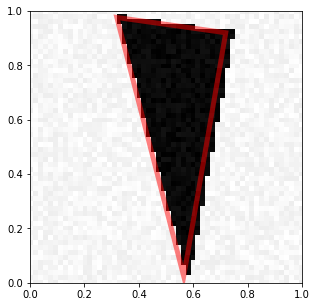

In [743]:
visualize_prediction(X_train6[0], Y_train6[0])


# 6.2. Reformating the input

In [744]:
X_train7 = X_train6.reshape(X_train6.shape[0], 72,72,1)
X_train8=X_train7[:700,:,:,:]
X_val=X_train7[700:,:,:,:]

# 6.3. Reformating the  Ouput

In [771]:
Y_train7 = Y_train6.reshape(Y_train6.shape[0], 3,2)
Y_train7 =np.array([i[i[:,0].argsort()] for i in Y_train7]) 
Y_train7 = Y_train7.reshape(Y_train7.shape[0], 6,)
Y_train8=Y_train7[:700,:]
Y_val=Y_train7[700:,:]
print(Y_train8.shape)

(700, 6)


# 6.3. Creating the model

In [755]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import itertools
from keras.optimizers import Adam,SGD

model = Sequential()
nb_neurons = 16
    
model.add(Conv2D(nb_neurons, (5, 5),input_shape=(72, 72, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
    
model.add(Conv2D(nb_neurons, (5, 5)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))
    
model.add(Conv2D(nb_neurons, (5, 5)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Activation('relu'))
    
model.add(Conv2D(nb_neurons, (5, 5)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Activation('relu'))
    
    
model.add(Flatten()) 
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
   
model.add(Dense(6))
model.add(BatchNormalization())
model.add(Activation('linear'))

    

# 6.4. Optimization

- I tried here different values for the learning rates/epochs..

In [765]:
lrt=0.01
sgd = SGD(lr=lrt,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy']) 
model.fit(X_train8, Y_train8, epochs=50, batch_size=32,validation_data= (X_val, Y_val)) 

lrt=0.005
adam=Adam(lr=lrt)
model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
model.fit(X_train8, Y_train8, epochs=10, batch_size=32,validation_data= (X_val, Y_val)) 

lrt=0.001
sgd = SGD(lr=lrt,decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='mean_squared_error',optimizer=sgd, metrics=['accuracy']) 
model.fit(X_train8, Y_train8, epochs=10, batch_size=32,validation_data= (X_val, Y_val)) 

print(model.summary())

Train on 700 samples, validate on 300 samples
Epoch 1/50
700/700 [==============================] - 62s 89ms/step - loss: 0.0229 - acc: 0.6486 - val_loss: 0.0561 - val_acc: 0.4333
Epoch 2/50
700/700 [==============================] - 23s 33ms/step - loss: 0.0227 - acc: 0.6786 - val_loss: 0.0548 - val_acc: 0.4367
Epoch 3/50
700/700 [==============================] - 23s 33ms/step - loss: 0.0226 - acc: 0.6757 - val_loss: 0.0546 - val_acc: 0.4533
Epoch 4/50
700/700 [==============================] - 24s 34ms/step - loss: 0.0217 - acc: 0.6700 - val_loss: 0.0559 - val_acc: 0.4667
Epoch 5/50
700/700 [==============================] - 23s 33ms/step - loss: 0.0218 - acc: 0.6657 - val_loss: 0.0563 - val_acc: 0.4600
Epoch 6/50
700/700 [==============================] - 24s 34ms/step - loss: 0.0214 - acc: 0.6600 - val_loss: 0.0565 - val_acc: 0.4500
Epoch 7/50
700/700 [==============================] - 23s 34ms/step - loss: 0.0209 - acc: 0.6729 - val_loss: 0.0556 - val_acc: 0.4533
Epoch 8/50
700/7

700/700 [==============================] - 45s 64ms/step - loss: 0.0097 - acc: 0.7700 - val_loss: 0.0166 - val_acc: 0.7200
Epoch 2/10
700/700 [==============================] - 25s 35ms/step - loss: 0.0103 - acc: 0.7457 - val_loss: 0.0142 - val_acc: 0.7500
Epoch 3/10
700/700 [==============================] - 25s 35ms/step - loss: 0.0098 - acc: 0.7871 - val_loss: 0.0135 - val_acc: 0.7700
Epoch 4/10
700/700 [==============================] - 24s 34ms/step - loss: 0.0094 - acc: 0.7814 - val_loss: 0.0134 - val_acc: 0.7867
Epoch 5/10
700/700 [==============================] - 24s 35ms/step - loss: 0.0102 - acc: 0.7686 - val_loss: 0.0146 - val_acc: 0.7733
Epoch 6/10
700/700 [==============================] - 22s 32ms/step - loss: 0.0102 - acc: 0.7786 - val_loss: 0.0161 - val_acc: 0.7533
Epoch 7/10
700/700 [==============================] - 26s 37ms/step - loss: 0.0098 - acc: 0.7586 - val_loss: 0.0171 - val_acc: 0.7300
Epoch 8/10
700/700 [==============================] - 24s 34ms/step - los

# 6.5. Evaluation

In [768]:
[X_test8,Y_test8]=generate_test_set_regression()

X_test8=X_test8.reshape(X_test8.shape[0], 72,72,1)
Y_test8 = Y_test8.reshape(Y_test8.shape[0], 3,2)
Y_test8 =np.array([i[i[:,0].argsort()] for i in Y_test8]) 
Y_test8 = Y_test8.reshape(Y_test8.shape[0], 6,)


y_pred=model.predict(X_test8)

score= mean_squared_error(y_pred.flatten(), Y_test8.flatten())

print("The test loss is ",score)

Creating data:
The test loss is  0.017193557081695506


# 6.6. Evaluation

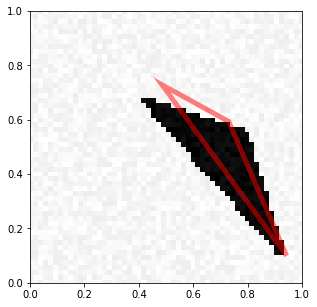

In [776]:
visualize_prediction(X_test8[5], y_pred[5])

- The prediction results obtained are relatively good.
- he model predicts well on some input images and may give insufficient results for others.

# 7. Image Denoising

# 7.1. Generating the pairs of images

In [783]:
def generate_a_triangle_with_noise(noise, free_location=True):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, 0.0)
    imdata_noise =  generate_a_drawing(figsize, U, V, noise)
    return [imdata,imdata_noise]

def generate_dataset_with_noise(nb_samples,noise_d, noise=0.0):
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, im_size])
    print('Creating data:')
    for i in range(nb_samples):
        #if i % 10 == 0:
        #    print(i)
        [X[i], Y[i]] = generate_a_triangle_with_noise(noise_d, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]



# 7.2. Generating the data

In [797]:
[X_train_noise_,Y_train_noise_] =generate_dataset_with_noise(300,20)
X_train_noise_=X_train_noise_.reshape(X_train_noise_.shape[0] ,72,72,1 )
Y_train_noise_=Y_train_noise_.reshape(X_train_noise_.shape[0] ,72,72,1 )

Creating data:


In [798]:
X_train_noise=X_train_noise_[:200,:,:,:]
Y_train_noise=Y_train_noise_[:200,:,:,:]

X_train_val=X_train_noise_[200:,:,:,:]
Y_train_val=Y_train_noise_[200:,:,:,:]

# 7.3. The hourglass network for denoising

In [800]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from keras.models import Model
from keras import backend as K
from keras.layers.normalization import BatchNormalization

input_img = Input(shape=(72, 72, 1))  

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)


encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)

decoded = Conv2D(1, (3, 3), activation='linear', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [802]:
from keras.callbacks import TensorBoard

autoencoder.fit(X_train_noise, Y_train_noise,epochs=50,batch_size=64,shuffle=True,validation_data=(X_train_val, X_train_val),callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 200 samples, validate on 100 samples
Epoch 1/50
200/200 [==============================] - 17s 84ms/step - loss: 708.5799 - val_loss: 77869.3784
Epoch 2/50
200/200 [==============================] - 15s 77ms/step - loss: 697.7956 - val_loss: 78140.3616
Epoch 3/50
200/200 [==============================] - 16s 78ms/step - loss: 723.0049 - val_loss: 69351.3412
Epoch 4/50
200/200 [==============================] - 15s 77ms/step - loss: 714.4778 - val_loss: 74284.5056
Epoch 5/50
200/200 [==============================] - 15s 77ms/step - loss: 660.7251 - val_loss: 72099.5813
Epoch 6/50
200/200 [==============================] - 15s 74ms/step - loss: 649.2465 - val_loss: 72118.1938
Epoch 7/50
200/200 [==============================] - 16s 78ms/step - loss: 654.2885 - val_loss: 73155.2388
Epoch 8/50
200/200 [==============================] - 17s 87ms/step - loss: 631.3270 - val_loss: 71528.1434
Epoch 9/50
200/200 [==============================] - 16s 79ms/step - loss: 625.8465 - val